### **_CODSOFT INTERNSHIP_**

Task 2: Movie Rating Prediction Model

Author: Vaibhav Rakshe

Aim: To create a machine learning model in order to analyze movie data and develop a model that accurately estimates the rating given to a movie by users or critics..

#### **_PROJECT INTRODUCTION_**

This set is pulled from IMDb.com of all the Indian movies on the platform. It consists of columns like Genre, voting, release year, actor names, director, ratings and others. I Clean this data by removing missing values or adding average values. This process helped me to manipulate the data to help with my EDA.

The objective of this project is to create a machine learning model that accurately estimates movie ratings given by users or critics. By analyzing various features such as genre, cast, director, budget, and release date, we aim to uncover patterns and relationships within the data. This project involves data preprocessing, exploratory data analysis, and model training and evaluation. The ultimate goal is to develop a robust predictive model that can provide reliable rating predictions and insights into the factors influencing movie ratings.

## **_GETTING STARTED!!_**

### **_Exploratory Data Analysis_**

#### *Import Required Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### *IMPORTING DATASET*

In [2]:
# Importing dataset to work upon
dataset = pd.read_csv("IMDb_Rating_Dataset.csv", encoding='ISO-8859-1')

In [3]:
# Checking dimentions
dataset.shape

(15509, 10)

#### *DATA CLEANING AND DATA HANDLING*

In [4]:
# Display top five records
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
# Extracting information from data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
# Checking null value count
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
# Drop null value records
dataset = dataset.dropna()

In [8]:
# reconfirm null count
dataset.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [9]:
# Dimentions after data cleaning
dataset.shape

(5659, 10)

In [10]:
# Checking Duplicates
dataset.duplicated().sum()

0

In [11]:
dataset["Rating"] = dataset.pop("Rating")

In [12]:
dataset = dataset.drop(["Name"], axis=1)

#### *PREPARING THE VALUES TO FLOAT*

In [13]:
dataset["Duration"] = dataset["Duration"].astype(str).str.extract('(\d+)').astype(float)
dataset['Year'] = dataset['Year'].str.extract('(\d+)').astype(float)
dataset['Votes'] = dataset['Votes'].str.replace(',', '').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vaibh\AppData\Local\Temp\ipykernel_22672\474062881.py:1: SyntaxWarning: invalid escape sequence '\d'
  dataset["Duration"] = dataset["Duration"].astype(str).str.extract('(\d+)').astype(float)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_22672\474062881.py:2: SyntaxWarning: invalid escape sequence '\d'
  dataset['Year'] = dataset['Year'].str.extract('(\d+)').astype(float)


#### *SPLITTING THE DATASET INTO FEATURES AND TARGET COLUMN*

In [14]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

In [15]:
x.shape

(5659, 8)

In [16]:
y.shape

(5659,)

#### *TRANSFORMING CATEGORICAL VALUES INTO NUMERICAL VALUES*

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('Genre_encoder', OneHotEncoder(sparse_output=False), [2]),
('director encoder', OneHotEncoder(sparse_output=False), [4]),
('Actor1_encoder', OneHotEncoder(sparse_output=False), [5]),
  ('Actor_2 encoder', OneHotEncoder(sparse_output= False), [6]),
  ('Actor_3 encoder', OneHotEncoder(sparse_output= False), [7])],
    remainder='passthrough')

x = np.array(ct.fit_transform(x))

In [18]:
print(x)

[[   0.    0.    0. ... 2019.  109.    8.]
 [   0.    0.    0. ... 2019.  110.   35.]
 [   0.    0.    0. ... 1997.  147.  827.]
 ...
 [   0.    0.    0. ... 1989.  125.   44.]
 [   0.    0.    0. ... 1999.  129.  655.]
 [   0.    0.    0. ... 1998.  130.   20.]]


In [19]:
x.shape

(5659, 9647)

#### *SPLITTING THE DATASET INTO TRAINING SET AND TEST SET*

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state = 0)

#### *FEATURE SCALING OF INDEPENDENT VARIABLES*

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#### *CREATING AND FITTING THE MODEL*

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model = Sequential()

#model.add(Dense(units= 100, activation= 'relu'))
model.add(Dense(units= 300, activation= 'relu'))
model.add(Dense(units= 200, activation= 'relu'))
model.add(Dense(units= 100, activation= 'relu'))
model.add(Dense(units= 150, activation= 'relu'))
model.add(Dense(units= 100, activation= 'relu'))
model.add(Dense(units= 50, activation= 'relu'))

model.add(Dense(units= 1, activation= 'linear'))

In [24]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [25]:
model.fit(x_train, y_train, batch_size = 10, epochs= 30)

Epoch 1/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - loss: 5.4216
Epoch 2/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - loss: 0.9045
Epoch 3/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 0.4279
Epoch 4/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 0.2562
Epoch 5/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 0.1905
Epoch 6/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 0.1544
Epoch 7/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 0.1329
Epoch 8/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - loss: 0.1186
Epoch 9/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - loss: 0.1112
Epoch 10/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - loss: 0.0976
Epoch 11/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 0.0927
Epoch 12/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 0.0907
Epoch 13/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - loss: 0.0749
Epoch 14/30
561/561 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - loss: 0.0724
Epoch 15/30
561/561 ━━━━━━━━━

<function matplotlib.pyplot.show(close=None, block=None)>

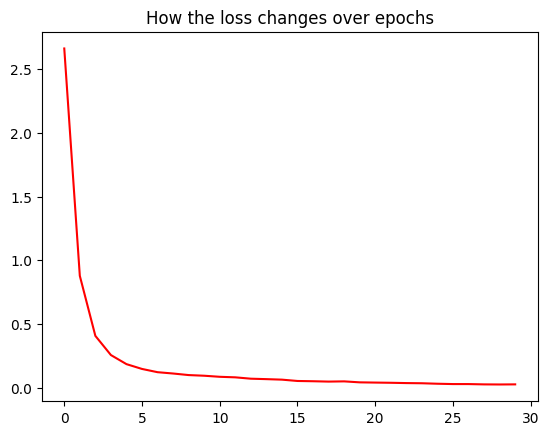

In [26]:
loss_data = pd.DataFrame(model.history.history,)
plt.plot(loss_data, c= 'red')
plt.title("How the loss changes over epochs")
plt.show

#### *COMPARING ORIGINAL RATING & PREDICTED RATING*

In [27]:
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred.reshape(len(y_test),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))
df = pd.concat((y_test, y_pred),axis=1)
df.columns = ['true value','predicted value']

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [28]:
df

,true value,predicted value
0,6.6,6.223451
1,5.9,6.885700
2,4.7,6.432720
3,6.2,5.791857
4,4.5,5.185404
5,6.1,10.237986
6,4.2,5.013769
7,3.6,4.092000
8,5.2,6.546101
9,5.7,5.561106


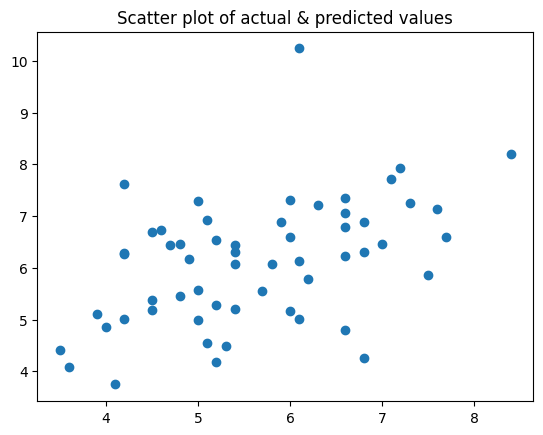

In [29]:
plt.scatter(y_test, y_pred)
plt.title("Scatter plot of actual & predicted values")
plt.show()

Text(0.5, 1.0, 'True vs Predicted ratings for different movies')

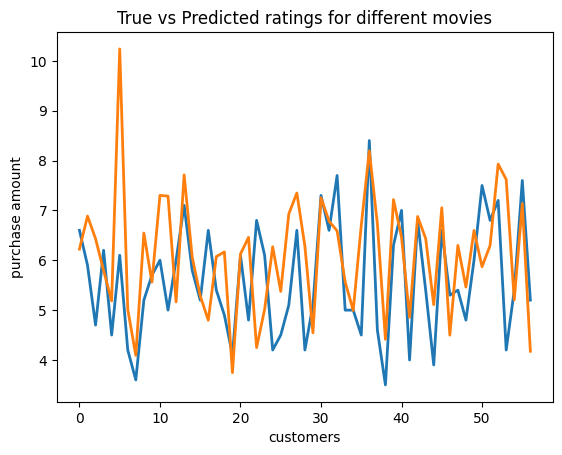

In [30]:
plt.xlabel('customers')
plt.ylabel('purchase amount')
plt.plot(y_test, linewidth= 2) #blue lines
plt.plot(y_pred,linewidth= 2) #orange lines
plt.title('True vs Predicted ratings for different movies')

#### *CHECKING THE ACCURACY AND PERFORMANCE OF THE MODEL*

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:".ljust(25),round(mean_absolute_error(y_test, y_pred),3))
print("mean absolute percentage error:".ljust(32),round(mean_absolute_percentage_error(y_test, y_pred),2))
print("Root Mean Squared Error:".ljust(25), np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3))

Mean Absolute Error:      1.008
mean absolute percentage error:  0.19
Root Mean Squared Error:  1.306


In [32]:
dataset['Rating'].describe()

count    5659.000000
mean        5.898533
std         1.381165
min         1.100000
25%         5.000000
50%         6.100000
75%         6.900000
max        10.000000
Name: Rating, dtype: float64